In [1]:
"""
Multilabel active learning algorithms (query strategies): 
  1) Binary Minimization (BinMin)
     Calculates the uncertainty of each label independently
  2) Maximal Loss Reduction with Maximal Confidence (MMC)
     Uncertainty based upon the difference between predictions from two
     different multilabel classifiers. MMC uses two multilabel classifiers:
     i) binary relevance
     ii) stacked logistic regression
  3) Multilabel Active Learning With Auxiliary Learner (MLALAL)
     As with MMC, uncertainty based upon the difference between predictions 
     from two different multilabel classifiers
  4) Random Sampling (used as a baseline for comparision)
  TO DO 5) Adaptive Active Learning (multilabel/adaptive_active_learning.py)

Query Criteria (i.e. options for evaluating the prediction differences) 
used for MMC and MLALAL query strategies
i) Hamming Loss Reduction (HLR)
ii) Soft Hamming Loss Reduction (SHLR)
iii) Maximum Margin Reduction (MMR)

The Maluuba dataset contains 1367 conversations, consisting of 19,984 
converstion turns in total. These conversatiuon turns the examples and each of 
these examples can have upto 20 labels.

The Amazon dataset contains 24k datapoints with a one-hot 24-dimensional 
(for 24 categories) vector indicating its product category.


This scripts generates error bars using results from 3 full experiments over 
each of the 6 Active learning strategies. For each of the 3 experiments, a set 
of sets of 5k data points are sampled to produce a dataset which is then 
shuffled and split into a training and test set and fed to each of the 
algorithms.

"""

import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

from word_vec_fn import full_trn_tst, experiments, load_data_mal
from word_vec_fn import load_glove_model, load_data_amz

np.random.seed(0)
glove_data = './data/glove.840B.300d.txt'
n_experiments = 3

In [2]:
# Dictionary {word:vector}, where each word is a key, and the value is a
# row vector of shape (n_features,).
model = load_glove_model(glove_data)

# Seperate functions for each dataset:
# X, Y = load_data_mal(model, loc='./data/maluuba/data_frames.json')
X, Y = load_data_amz(model, loc='./data/amazon/amazon_mixed_dataset.json')

100,000 glove vectors loaded from existing file.


In [3]:
# After each of the 150 queries the classifier will be retrained
quota=150

all_exp_results = []

for i in range(n_experiments):
    print 1
    # Split data into training and testing sets
    trn_ds, tst_ds, fully_labeled_trn_ds = full_trn_tst(X, Y, train_size = 0.3, 
                                                        test_size=0.05, 
                                                        num_labelled = 10)
    print 2
    results = experiments(fully_labeled_trn_ds, trn_ds, tst_ds, quota)
    all_exp_results.append(results)
    print 3, i


1
2
before qs1
before qs2
before qs3
before qs4
before qs5
before qs6
Done qs6
3 0
1
2
before qs1
before qs2
before qs3
before qs4
before qs5
before qs6
Done qs6
3 1
1
2
before qs1
before qs2
before qs3
before qs4
before qs5
before qs6
Done qs6
3 2


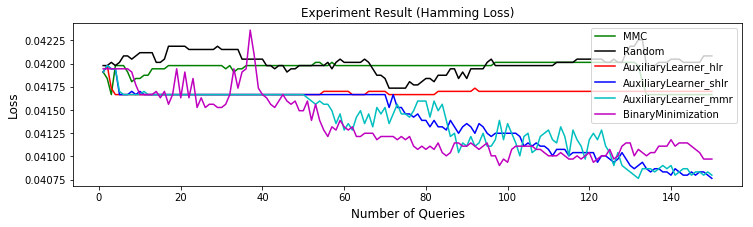

In [5]:
query_num = np.arange(1, quota + 1)

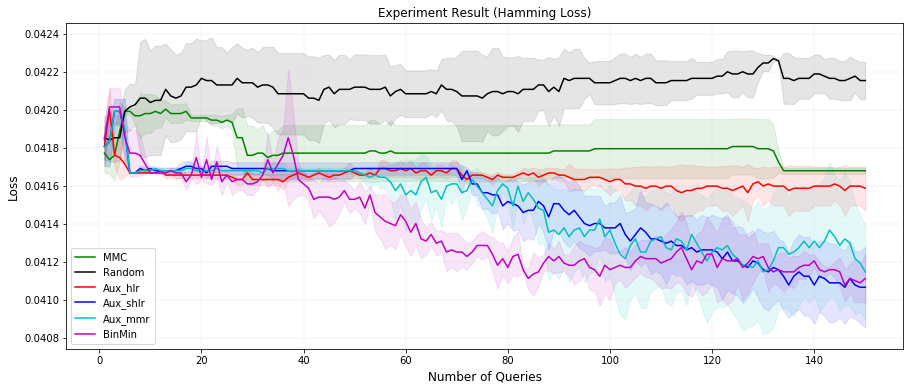

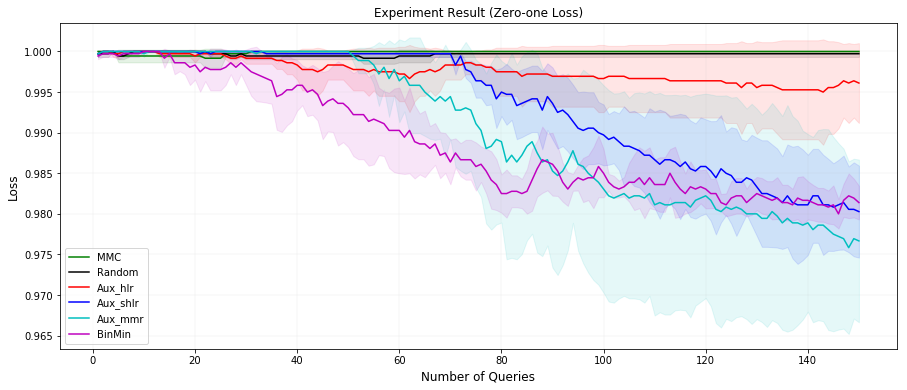

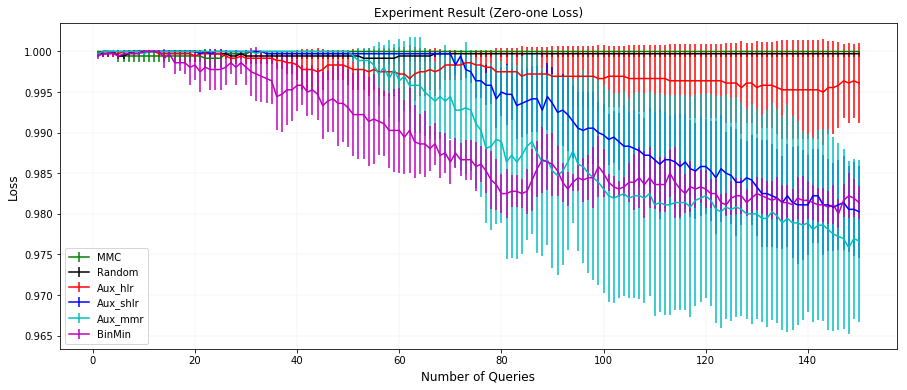

In [7]:
# Rough code to create graphs

colors = ['g','k','r','b','c','m']
strategies = ['MMC', 'Random', 'Aux_hlr', 'Aux_shlr', 'Aux_mmr', 'BinMin']

# Multiply the stanarddeviation by this factor to make the results clearer
std_factor = 1

for j in range(len(strategies)):

    ham_arr = np.zeros((1, 150))
    zero_arr = np.zeros((1, 150))

    for i in range(n_experiments):
        ham, zero = all_exp_results[i][strategies[j]]
        ham = ham.reshape(1,150)
        zero = zero.reshape(1, 150)

        ham_arr = np.append(ham_arr, ham, axis=0)
        zero_arr = np.append(zero_arr, zero, axis=0)

    # To ignore line of zeros used to create the array (must be a better way!)
    ham_mean = np.mean(ham_arr[1:, :], axis=0)
    ham_std = np.std(ham_arr[1:, :], axis=0)
    zero_mean = np.mean(zero_arr[1:, :], axis=0)
    zero_std = np.std(zero_arr[1:, :], axis=0)
    
    
    plt.figure(1, figsize=(15, 6))
    plt.plot(query_num, ham_mean, colors[j], label=strategies[j])
    plt.fill_between(query_num, ham_mean - ham_std*std_factor, ham_mean + ham_std*std_factor, 
                     alpha=0.1, color=colors[j], lw=1)
        
    plt.figure(2, figsize=(15, 6))
    plt.plot(query_num, zero_mean, colors[j], label=strategies[j])
    plt.fill_between(query_num, zero_mean - zero_std*std_factor, zero_mean + zero_std*std_factor, 
                     alpha=0.1, color=colors[j], lw=1)
    
    plt.figure(3, figsize=(15, 6))
    plt.errorbar(query_num, zero_mean, yerr=zero_std, color=colors[j], label=strategies[j])


# Can refactor?
plt.figure(1)
plt.grid(lw=0.1)
plt.title('Experiment Result (Hamming Loss)', fontsize=12)
plt.xlabel('Number of Queries', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)

plt.figure(2)
plt.grid(lw=0.1)
plt.title('Experiment Result (Zero-one Loss)', fontsize=12)
plt.xlabel('Number of Queries', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)

plt.figure(3)
plt.grid(lw=0.1)
plt.title('Experiment Result (Zero-one Loss)', fontsize=12)
plt.xlabel('Number of Queries', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)


plt.show()


